<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What's in this Notebook
The data in this notebook is of *Online Retail of some UK-based*. The data is at transactional level. Here I covered some customer segmentation technique - 
1. Cohort Analysis
2. RFM Analysis
3. k-Means Clustering

Also data pre-processing and cleaning is done first and then all the above discussed technqiue is implemented.<br>
All the necessary steps and explaination is provided with commenting on the code as well.<br>
`If you like this notebook UPVOTE it and for any reviews and doubts please leave a comment`.

In [1]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install kaggle update # instalamos kaggle. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# antes de nada subimos en temporal kaggle.json. OJO CON ESTO QUE NO ME ENTERO. tengo que subirlo en google colaborate. en la parte izquierda me pongo en la carpeta y en la flecha de subir.
# posteriormente elijo el archivo json del ordenador y lo subo. 
!mkdir -p ~/.kaggle # creamos el provisional directorio de kaggle. 

In [6]:
! cp kaggle.json ~/.kaggle/ # llevamos el archivo al directorio creado.

In [7]:
! chmod 600 ~/.kaggle/kaggle.json # le damos permios para acceder.

In [8]:
# importante en kaggle me tengo que poner en dataset y buscar lo que necesito. si lo encuentro tengo que poner despúes de download por ejemplo
# en este caso pone esto https://www.kaggle.com/datasets/hellbuoy/car-price-prediction y que lo que debo poner después de download es a partir de hellbuoy
! kaggle datasets download vijayuv/onlineretail
# aqui es cuando no es competición e igualmente solo tenemos que meter después del download lo siguiente “https://www.kaggle.com/arenagrenade/the-complete-pokemon-images-data-set”
# arenagrenade/the-complete-pokemon-images-data-set”

  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 83.7MB/s]


In [9]:
# si los archivos vienen en zip se abren de la siguiente manera. 
import zipfile # importamos esta librería
datazip = zipfile.ZipFile("/content/onlineretail.zip") # esta es la dirección donde esta el zip
datazip.extract("OnlineRetail.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. 
# a partir de este momento ya lo tenemos en temporal. 

'/content/OnlineRetail.csv'

In [10]:
df = pd.read_csv("/content/OnlineRetail.csv", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.shape

(541909, 8)

In [12]:
# looking at the overall picture
df.info()
# tiene toda la pinta que tenemos valores null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
# voy a cambiar el campo invoicedate a fecha. 
df.InvoiceDate = pd.to_datetime(df.InvoiceDate) # aqui lo estoy convirtiendo

In [14]:
# checking the number of missing values in each column
df.isnull().sum()

# como podemos ver debajo tenemos 1254 description sin valores y y 135080 customerid null

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## BASIC CLEANING

In [15]:
# count of duplicated rows in the data
df.duplicated().sum()

5268

In [32]:
# removing the duplicate rows
df = df[~df.duplicated()]
df.shape
# NOS QUEDAMOS CON 536641 FILAS Y 8 VARIABLES. 

(526054, 8)

In [16]:
# these are the transactions that have negative quantity which indicates returned or cancelled orders
df[df['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
# removing all the invoice number who starts with 'C' as they are returned orders
df = df[df['InvoiceNo'].str.startswith('C')!=True] # diferentes a True para quitarlas
df.shape
# despues de quitarnos las devoluciones el shape es el de debajo. 

(532621, 8)

In [18]:
# checking the number of unique transactions
# though there are more than 5 lakh entries but the number of transaction happened is 21892
df.InvoiceNo.nunique()
# debajo vemos que el numero de facturas unicas es 22064. es decir 22064 facturas generan 527390 filas

22064

In [19]:
# checking the unique stock ids in the data or number of unqiue item sold by retailer
df.StockCode.nunique()
# este el numero de articulos diferentes. 

4059

In [20]:
# top 10 stock ids that sold the most
df.StockCode.value_counts().head(10)
# con esto sacamos por numeros de lineas que articulos son los que más se venden

85123A    2271
85099B    2115
22423     2022
47566     1707
20725     1595
84879     1490
22197     1426
22720     1403
21212     1370
20727     1328
Name: StockCode, dtype: int64

In [21]:
# looking at the distribution of the quantity
# we seen that there is negative value which might indicate return orders
df.Quantity.describe()

count    532621.000000
mean         10.239972
std         159.593551
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [22]:
# looking at the data where quantity is negative and possible explanation is these are return orders or cancelled order
df[df['Quantity']<0]
# hay 1336 filas que tienen valores negativos en cantidad. 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [23]:
# keeping only those transactions that have successfully ordered
df = df[df['Quantity']>=0]
df.shape
# nos quedamos solo con las positivas

(531285, 8)

In [24]:
print('The minimum date is:',df.InvoiceDate.min())
print('The maximum date is:',df.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


In [25]:
# checking the distribution of unit price
df.UnitPrice.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
# con esto sacamos los percentiles del precio

count    531285.000000
mean          3.857296
std          41.810047
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
90%           7.950000
95%           9.950000
99%          16.980000
max       13541.330000
Name: UnitPrice, dtype: float64

In [27]:
# we see that more than 90% have country as UK which is obvious as the retailer is UK based
df.Country.value_counts(normalize=True) # con esto sacamos los pesos por lineas de cada pais. 

# vemos que más del 90% de las transacciones son de United Kingdom. 

United Kingdom          0.915302
Germany                 0.017019
France                  0.015826
EIRE                    0.014858
Spain                   0.004677
Netherlands             0.004448
Belgium                 0.003823
Switzerland             0.003702
Portugal                0.002825
Australia               0.002230
Norway                  0.002018
Italy                   0.001427
Channel Islands         0.001408
Finland                 0.001289
Cyprus                  0.001156
Sweden                  0.000849
Unspecified             0.000839
Austria                 0.000749
Denmark                 0.000715
Poland                  0.000621
Japan                   0.000604
Israel                  0.000555
Hong Kong               0.000535
Singapore               0.000418
Iceland                 0.000343
USA                     0.000337
Canada                  0.000284
Greece                  0.000273
Malta                   0.000211
United Arab Emirates    0.000128
European C

In [28]:
# putting UK as one country and combine rest countries into one category
df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
df.Country.value_counts(normalize=True)
# si es United Kingdom el nombre de country será ese, si no lo es será otro. 

United Kingdom    0.915302
Others            0.084698
Name: Country, dtype: float64

In [29]:
# checking the number of unique item list
df.Description.nunique()

4077

In [30]:
# top 10 item sold
df.Description.value_counts().head(10)
# por descripción estos son los que más lineas tienen. 

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

In [31]:
# there are cases where the descriptions contains some code/name which are not directly refers to sales
# checking the data where description = ? and it is noted that customerid is NaN and unit price is 0
df[df['Description'].str.startswith('?')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom
282882,561665,22171,?,142,2011-07-28 16:55:00,0.0,NaN,United Kingdom
323315,565288,23135,?,101,2011-09-02 11:43:00,0.0,NaN,United Kingdom
421093,572920,72803A,?,117,2011-10-26 16:52:00,0.0,NaN,United Kingdom


In [32]:
# removing all the above entries
df = df[df['Description'].str.startswith('?')!=True]
df.shape
# todas aquellas filas con description en interrogación, las quitamos. es decir simpre que sea diferente de true. 

(531279, 8)

In [33]:
# checking the data where description = * and it is noted that customerid is NaN
df[df['Description'].str.startswith('*')==True]
# aqui las que empiezan por *

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom


In [34]:
# replacing with appropriate name
df['Description'] = df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))
# con esto lo que hacemos en reemplazarlas con otro nombre

In [35]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.islower()==True]['Description'].value_counts()
# aqui todas las descripciones que empiezan por minuscula. 

check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
taig adjust                             2
returned                                2
test                                    2
wrongly marked 23343                    1
michel oops                             1
wrongly coded 20713                     1
wrongly marked                          1
wrongly coded 23343                     1
damaged                                 1
amazon adjust                           1
dotcomstock                             1
dotcom adjust                           1
website fixed                           1
allocate stock for dotcom orders ta     1
found box                               1
for online retail orders                1
add stock to allocate online order

In [36]:
# removing all the above noises
df = df[df['Description'].str.islower()!=True]
df.shape

(531151, 8)

In [37]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.istitle()==True]['Description'].value_counts()

Manual                                 328
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Found                                    8
Dotcomgiftshop Gift Voucher £10.00       8
Dotcomgiftshop Gift Voucher £30.00       7
Amazon                                   7
Dotcomgiftshop Gift Voucher £50.00       4
Dotcomgiftshop Gift Voucher £40.00       3
High Resolution Image                    3
Adjustment                               2
Dotcomgiftshop Gift Voucher £100.00      1
Amazon Adjustment                        1
John Lewis                               1
Name: Description, dtype: int64

In [38]:
# removing all the above listed noises
df = df[df['Description'].str.istitle()!=True]
df.shape
# estamos quitando todas las que no empiecen por mayusculas. 

(530678, 8)

In [39]:
df['Description'] = df['Description'].str.strip()

In [40]:
# count of unique customer
df.CustomerID.nunique()  # tenemos 4335 clientes

4335

In [41]:
# checking where customer id is null
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [42]:
# removing entries where customer id is null
df = df[~df.CustomerID.isnull()]
df.shape

(397540, 8)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397540 non-null  object        
 1   StockCode    397540 non-null  object        
 2   Description  397540 non-null  object        
 3   Quantity     397540 non-null  int64         
 4   InvoiceDate  397540 non-null  datetime64[ns]
 5   UnitPrice    397540 non-null  float64       
 6   CustomerID   397540 non-null  float64       
 7   Country      397540 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [44]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [45]:
# checking random 5 rows from data
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
427219,573379,23344,JUMBO BAG 50'S CHRISTMAS,10,2011-10-30 14:03:00,2.08,15680.0,United Kingdom
354034,567854,23389,SPACEBOY MINI BACKPACK,4,2011-09-22 13:37:00,4.15,14038.0,United Kingdom
37682,539475,84920,PINK FLOWER FABRIC PONY,1,2010-12-19 14:41:00,3.75,16686.0,United Kingdom
262341,559912,22456,NATURAL SLATE CHALKBOARD LARGE,3,2011-07-13 15:04:00,4.95,14221.0,United Kingdom
538469,581405,22472,TV DINNER TRAY DOLLY GIRL,1,2011-12-08 13:50:00,1.95,13521.0,United Kingdom


## EDA

In [47]:
# creating some columns for exploratory

df['Amount'] = df['Quantity']*df['UnitPrice']
df['year'] = df['InvoiceDate'].dt.year # sacamos el año de la fecha
df['month'] = df['InvoiceDate'].dt.month # sacamos el mes
df['day'] = df['InvoiceDate'].dt.day # sacamos el día. 
df['hour'] = df['InvoiceDate'].dt.hour # sacamos la hora
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek # sacamos el día de la semana. 

In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


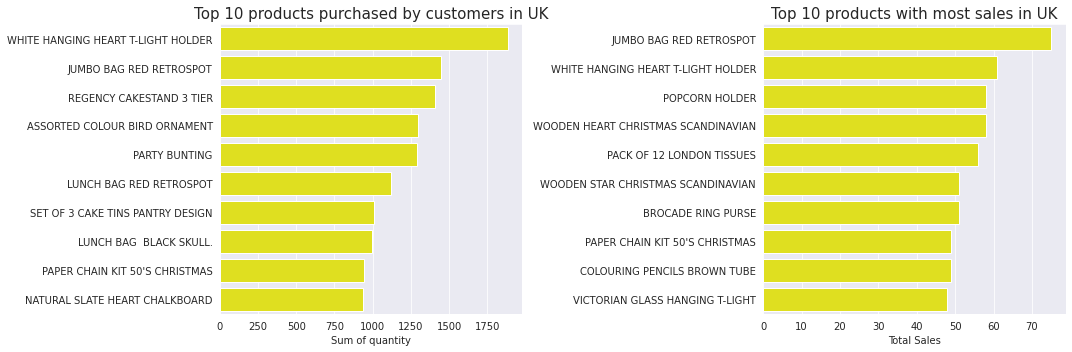

In [49]:
column = ['InvoiceNo','Amount']  # prefijamos las dos variables que vamos a coger, metiendolas en una varialbes que es una lista. 

plt.figure(figsize=(15,5)) # tamaño del gráfico
for i,j in enumerate(column): # para cada fila y columna. Enumerate  es una función. añade un contador a un iterable y lo devuelve en objeto de enumeración. 
    plt.subplot(1,2,i+1) 
    sns.barplot(x = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values, # aqui actua sobre los valores
                # si la ciudad es igual a united kingdom agrupar por columna description. valores unicos, ordenar
                y = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index, # aqui actua sobre el index. 
                # si es united kingdom agrupar por columna description, valores unicos, ordenar. 
                color='yellow')
    plt.ylabel('')  # parametros de la etiqueta y
    if i==0: # si la columna es invoiceNo, ya que esta en la lista de arriba colum como la primera. 
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

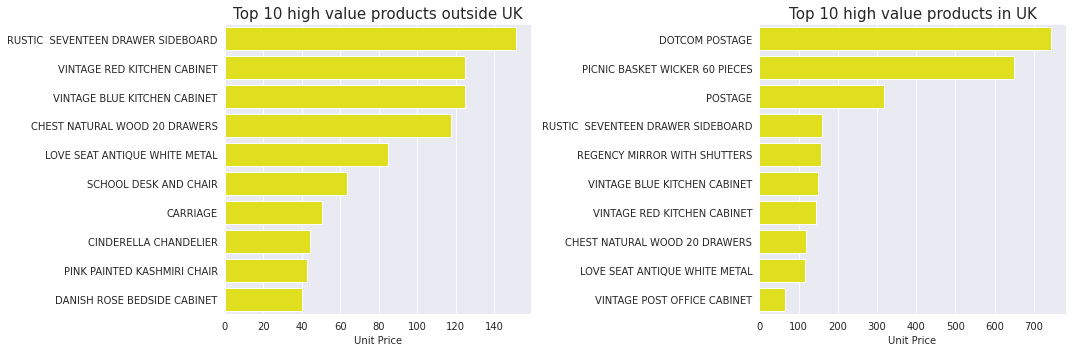

In [50]:
column = ['Others','United Kingdom']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).values,
                y = df[df['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products outside UK',size=15)
    else:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products in UK',size=15)
        
plt.tight_layout()
plt.show()

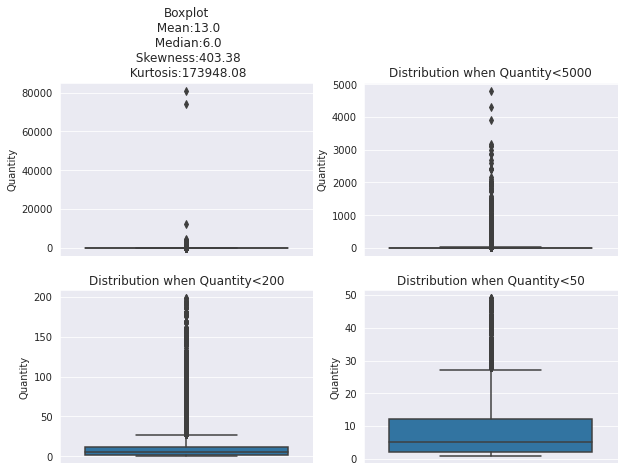

In [52]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df.Quantity.skew(),2) # calculamos el skewness
kurtosis = round(df.Quantity.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df.Quantity),0) # calculamos la media
median = np.median(df.Quantity) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df.Quantity)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df[df.Quantity<5000]['Quantity'])
plt.title('Distribution when Quantity<5000')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Quantity<200]['Quantity'])
plt.title('Distribution when Quantity<200')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Quantity<50]['Quantity'])
plt.title('Distribution when Quantity<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos de cantidad.

In [53]:
# removing the expectional case where quantity > 70000
df = df[df['Quantity']<70000]

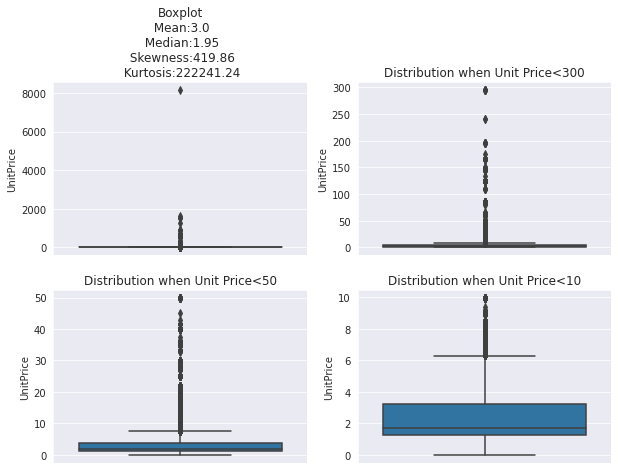

In [54]:
# Looking the distribution of column Unit Price
plt.figure(figsize=(10,7))

skewness = round(df.UnitPrice.skew(),2)
kurtosis = round(df.UnitPrice.kurtosis(),2)
mean = round(np.mean(df.UnitPrice),0)
median = np.median(df.UnitPrice)

plt.subplot(2,2,1)
sns.boxplot(y=df.UnitPrice)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=df[df.UnitPrice<300]['UnitPrice'])
plt.title('Distribution when Unit Price<300')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.UnitPrice<50]['UnitPrice'])
plt.title('Distribution when Unit Price<50')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.UnitPrice<10]['UnitPrice'])
plt.title('Distribution when Unit Price<10')

plt.show()

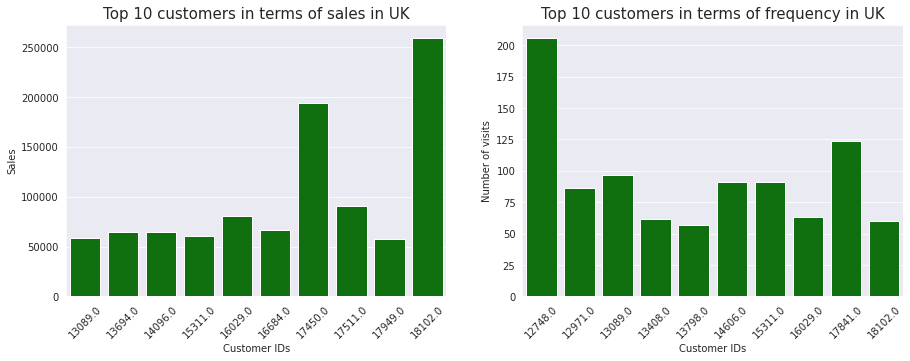

In [55]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que estamos haciendo es sumar la cantidad .
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Number of visits')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of frequency in UK',size=15)

plt.show()

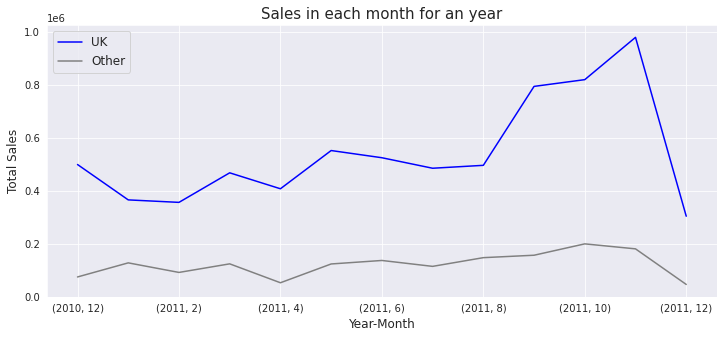

In [56]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()